<a href="https://colab.research.google.com/github/AdhamDakak/Predicting-House-Prices-CodeClause/blob/main/PredictingHousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#installing essential packages
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install seaborn
!pip install scikit-learn

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics


In [ ]:
#reading dataset
df=pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
#checking on null values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
#changing yes to 1 and no to 0
df.mainroad=df.mainroad.map({'yes':1,'no':0})
df.guestroom=df.guestroom.map({'yes':1,'no':0})
df.basement=df.basement.map({'yes':1,'no':0})
df.hotwaterheating=df.hotwaterheating.map({'yes':1,'no':0})
df.airconditioning=df.airconditioning.map({'yes':1,'no':0})
df.prefarea=df.prefarea.map({'yes':1,'no':0})
df.furnishingstatus=df.furnishingstatus.map({'furnished':1,'semi-furnished':0.5,'unfurnished':0})

In [13]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,0.5
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,0.5
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0.0
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,1.0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0.0


In [14]:
#describing dataset (max,min,mean,etc)
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.465138
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.380686
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000


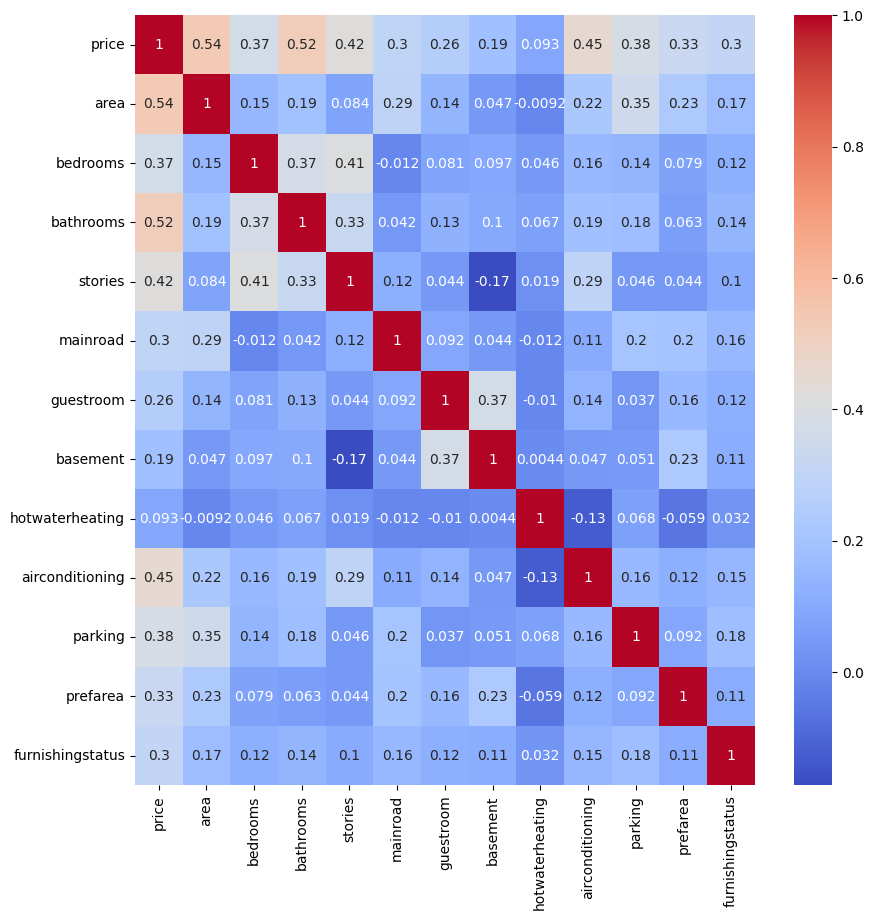

In [15]:
#creating a heatmap to show the correlation between variables
fig, ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',ax=ax)
plt.show()

In [16]:
#instantiating variables to train and test
x=df.drop(['price'],axis=1)
y=df.price
print(x)
print(y)
print(x.shape)
print(y.shape)


     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                  0              

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [18]:
#defining the model
model=LinearRegression()
#training the model
model.fit(x_train,y_train)

LinearRegression()

In [19]:
#predicting on training data
training_prediction=model.predict(x_train)

In [42]:
# print(training_prediction)

In [21]:
#evaluating the accuarcy of the model with training data
r_squared=metrics.r2_score(y_train,training_prediction)
print('R squared error:',r_squared)
mse=mean_squared_error(y_train,training_prediction)
print('mean sqared error: ',mse)
mae=mean_absolute_error(y_train,training_prediction)
print('mean absolute error: ',mae)


R squared error: 0.6854429472843788
mean sqared error:  969902818698.3116
mean absolute error:  718146.5977537858


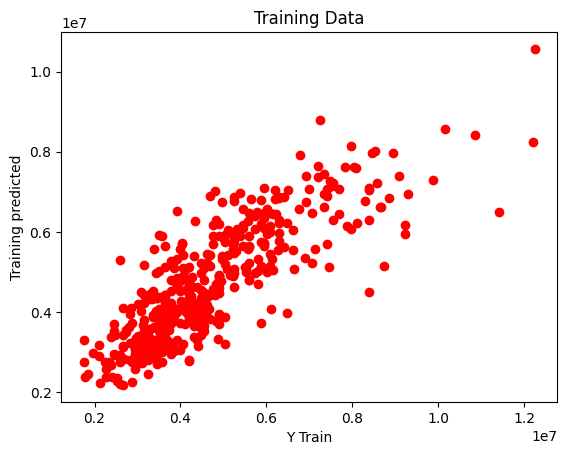

In [46]:
#plotting training data
plt.scatter(y_train, training_prediction, color='red')
plt.title('Training Data')
plt.xlabel('Y Train')
plt.ylabel('Training predicted')
plt.show()

In [25]:
#predicting testing data
testing_prediction=model.predict(x_test)

In [43]:
# print(testing_prediction)

In [26]:
#evaluating the accuarcy of the model with testing data

r_squared=metrics.r2_score(y_test,testing_prediction)
print('R squared error:',r_squared)
mse=mean_squared_error(y_test,testing_prediction)
print('mean sqared error: ',mse)
mae=mean_absolute_error(y_test,testing_prediction)
print('mean absolute error: ',mae)


R squared error: 0.6494754192267802
mean sqared error:  1771751116594.036
mean absolute error:  979679.6912959906


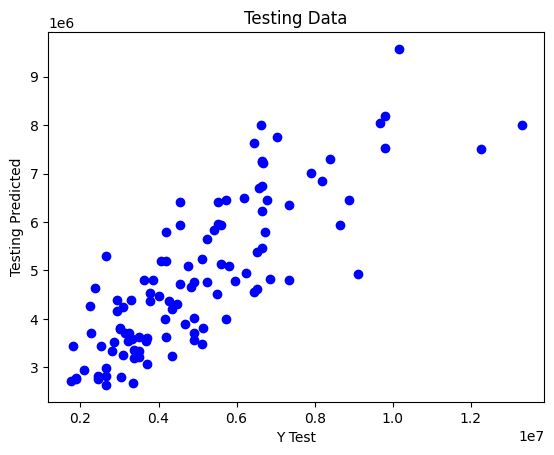

In [44]:
#plotting testing data
plt.scatter(y_test, testing_prediction, color='blue')
plt.title('Testing Data')
plt.xlabel('Y Test')
plt.ylabel('Testing Predicted')
plt.show()